In [3]:
import importlib
#import utils
#importlib.reload(utils)

from utils import extract_pool
from tqdm import tqdm 
import utils.optim_utils
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
importlib.reload(utils.optim_utils)
from utils.optim_utils import optim, optim_pool
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist, squareform
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

In [4]:
torch.cuda.get_device_name(0)

'GeForce GTX TITAN X'

# extract representations 

In [5]:
model='roberta-base'
group=f'{model}_layers'

#group='roberta-base_layers'
#group='xlnet-large-cased_layers'
#group='bert-large-uncased-whole-word-masking_layers'
#group='xlm-mlm-en-2048_layers'
#group='albert-xxlarge-v2_layers'
#group='ctrl_layers'
dataset='coca_spok_filter_punct_10K_sample_1'
activatiion_type='activation'
average='False'
name=f'group={group}-dataset={dataset}-{activatiion_type}-bench=None-ave={average}'
test=extract_pool[name]()
model_layers=test.layer_name
test.load_dataset()
test()

loading /om/user/ehoseini/MyData/COCA_corpus/parsed/coca_spok_data_filter_ngram_punct_10K_sample_1.pkl


1111it [00:00, 215196.81it/s]
1111it [00:00, 169031.91it/s]
1111it [00:00, 169154.63it/s]
1111it [00:00, 133478.61it/s]
1111it [00:00, 167194.28it/s]
1111it [00:00, 197762.24it/s]
1111it [00:00, 170503.91it/s]
1111it [00:00, 220575.20it/s]
1112it [00:00, 192594.71it/s]


extracting network activations for roberta-base
coca_spok_filter_punct_10K_sample_1_roberta-base_layer_0_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/coca_spok_filter_punct_10K_sample_1_roberta-base_layer_0_activation_ave_False.pkl
adding activations to set
extracting network activations for roberta-base
coca_spok_filter_punct_10K_sample_1_roberta-base_layer_2_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/coca_spok_filter_punct_10K_sample_1_roberta-base_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for roberta-base
coca_spok_filter_punct_10K_sample_1_roberta-base_layer_4_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/coca_spok_filter_punct_10K_sample_1_roberta-base_layer_4_activation_ave_False.pkl
adding activations to set
extracting network activations for roberta-base
coca_spok_filter

In [6]:
optim_name='coordinate_ascent_eh-obj=D_s-n_iter=50-n_samples=50-n_init=1-run_gpu=True'
optim_obj=optim_pool[optim_name]()
optim_obj.load_extractor(test)
optim_obj.precompute_corr_rdm_on_gpu()

In [7]:
S_opt_d, DS_opt_d = optim_obj()

2021-02-23 15:00:46,040 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] ===> Starting init 0, initial f(S) = 0.76586
2021-02-23 15:00:46,048 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 0, 2877 to 6872 after 1 swaps,  f(S) = 0.76735
2021-02-23 15:00:46,063 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 1, 8075 to 2251 after 6 swaps,  f(S) = 0.76806
2021-02-23 15:00:46,068 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 2, 6704 to 3305 after 0 swaps,  f(S) = 0.76895
2021-02-23 15:00:46,074 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 3, 7194 to 7619 after 0 swaps,  f(S) = 0.77607
2021-02-23 15:00:46,082 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 4, 8604 to 8731 after 2 swaps,  f(S) = 0.78034
2021-02-23 15:00:46,087 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t = 1] id = 5, 168 to 3911 after 0 swaps,  f(S) = 0.78653
2021-02-23 15:00:46,112 [INFO] [OPT-EXP-DSGN - coordinate_ascent_eh] [1/1] [t

# determine how much filtering affect the score


In [25]:
optimized_Ss=[x['optimized_S'] for x in optim_results]


In [23]:
n_rand_try=1000
D_s_selection=[]
for optim_s in optimized_Ss[-3:]:
    d_s_selec=[]
    for idx,_ in tqdm(enumerate(range(n_rand_try))):
        S_list=np.random.choice(optim_s, size=200, replace=False)
        d_s_selec.append(optim_obj.gpu_object_function(S_list))
    D_s_selection.append(d_s_selec)

1000it [00:01, 549.45it/s]
1000it [00:01, 611.92it/s]
1000it [00:01, 610.95it/s]


In [31]:
D_s_select=D_s[-3:]
x_bar_select=x_bar[-3:]
alph_col_select=alph_col[-3:,:]
alph_col_select

array([[0.206756, 0.371758, 0.553117, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.282623, 0.140926, 0.457517, 1.      ]])

Text(0.5, 1.0, 'Ds for a 200 subsample withing the full set')

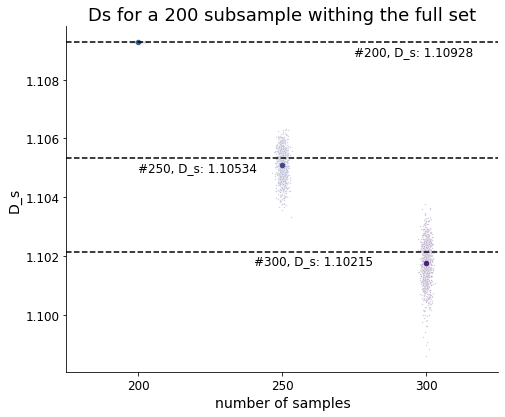

In [64]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_xlabel('number of samples',fontsize=14)
ax.set_ylabel('D_s',fontsize=14)
ax.set_xlim((175,325))



for idx, x in enumerate(x_bar_select):
    ax.scatter(np.random.normal(size=(np.asarray(D_s_selection[idx]).shape))+x,np.asarray(D_s_selection[idx]),color=alph_col_select[idx,:],edgecolors='w',s=2,alpha=.3)
    ax.scatter(x,np.asarray(D_s_selection[idx]).mean(),color=alph_col_select[idx,:],s=20)

#ax.scatter(x_bar_select,D_s_select,c=alph_col_select,s=50)

[ax.plot(ax.get_xlim(),d_s+np.multiply(0,ax.get_xlim()),'k--') for d_s in D_s_select]

str_val=["{:.5f}".format(x) for x in D_s_select]

[ax.text(x,D_s_select[idx]-0.0001,f'#{x_bar_select[idx]}, D_s: {str_val[idx]}',va='top',fontsize=12) for idx,x in enumerate([275,200,240])]
right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar_select)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_title('Ds for a 200 subsample withing the full set',fontsize=18)

In [50]:
ax.get_xlim()

(191.58239278004558, 308.3085002587727)

In [ ]:
S_opt_d, DS_opt_d=optim_obj()

In [ ]:
S_list=np.random.choice(optim_obj.N_S, size=300, replace=False)

In [ ]:
%timeit -n 5 optim_obj.gpu_object_function(S_list)

In [ ]:
%timeit -n 5 optim_obj.mod_objective_function(S_list)

In [110]:
optim_name='coordinate_ascent_eh-obj=D_s-n_iter=50-n_samples=25-n_init=1-run_gpu=True'
optim_obj=optim_pool[optim_name]()
optim_obj.load_extractor(test)



In [111]:
d_s_rand_cpu=[]
for idx,_ in tqdm(enumerate(range(1000))):
        S_list=np.random.choice(optim_obj.N_S, size=25, replace=False)
        d_s_rand_cpu.append(optim_obj.mod_objective_function(S_list))

1000it [00:05, 174.34it/s]


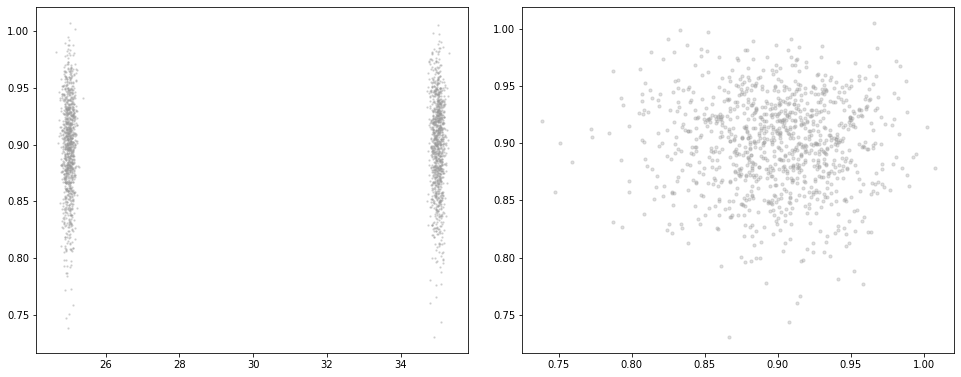

In [114]:

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
ax.scatter(np.random.normal(size=(np.asarray(d_s_rand_cpu).shape))/10+25,np.asarray(d_s_rand_cpu),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(np.random.normal(size=(np.asarray(D_s_Rand[0]).shape))/10+35,np.asarray(D_s_Rand[0]),color=(.6,.6,.6),s=2,alpha=.3)
ax = fig.add_axes([.55,.1,.4,.6])
ax.scatter(np.asarray(d_s_rand_cpu),np.asarray(D_s_Rand[0]),color=(.6,.6,.6),s=10,alpha=.3)

In [ ]:
gpu_optim=[]
cpu_optim=[]
for k in range(10):
    S_list=np.random.choice(optim_obj.N_S, size=300, replace=False)
    gpu_optim.append(optim_obj.gpu_object_function(S_list))
    cpu_optim.append(optim_obj.mod_objective_function(S_list))

In [ ]:
dval,X_corr_sample,XY_sample=optim_obj.gpu_object_function_debug(S_list)

In [ ]:
plt.imshow(XY_sample[1].cpu())

In [ ]:
k=6
test_np=np.array([optim_obj.activations[k]['activations'][int(s.mean())] for s in S_list])
D_vall=squareform(pdist(test_np,'correlation'))
change=D_vall-XY_sample[k].cpu().numpy()
plt.imshow(change)

plt.colorbar()



In [ ]:
X_corr_sample.cpu().numpy().transpose()

In [ ]:
patterns_list = [np.stack([x['activations'][i] for i in S_list]) for x in optim_obj.activations]

In [ ]:
test_np=np.stack([pdist(x,'correlation') for x in patterns_list])


In [ ]:
plt.plot(test_np.transpose()-X_corr_sample.cpu().numpy().transpose())

In [ ]:
plt.plot(test_np.transpose()[:,0],X_corr_sample.cpu().numpy().transpose()[:,0])

In [ ]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)
torch.backends.cudnn.deterministic = True
torch.set_deterministic(True)
torch.__version__
torch.set_printoptions(precision=10)

In [ ]:

activation_list=[torch.tensor(x['activations'],dtype=float,device=device,requires_grad=False) for x in optim_obj.activations]

In [ ]:
S_list=np.random.choice(optiS, size=n, replace=False)

In [ ]:
X=torch.nn.functional.normalize(test_data.squeeze())
X=(X-X.mean(axis=1,keepdim=True))
X=torch.nn.functional.normalize(X)
XY_corr=torch.tensor(1,device=device,dtype=float)-torch.mm(X,torch.transpose(X,1,0))

In [ ]:
del XY_corr
XY_corr=pt_create_corr_rdm_short(test_data.squeeze(),device=device)

In [ ]:

X_list=[torch.nn.functional.normalize(x.squeeze()) for x in activation_list]
X_list=[(X-X.mean(axis=1,keepdim=True)) for X in X_list]
X_list=[torch.nn.functional.normalize(X) for X in X_list]
XY_corr_list=[torch.tensor(1,device=device,dtype=float)-torch.mm(X,torch.transpose(X,1,0)) for X in X_list]

In [ ]:
samples=(torch.randint(0, 1000, (300,),dtype=torch.long,device=device))
pairs=torch.combinations(samples, with_replacement=False)

In [ ]:
XY_corr_sample=[XY_corr[pairs[:,0],pairs[:,1]] for XY_corr in XY_corr_list]
XY_corr_sample_tensor=torch.stack(XY_corr_sample)
XY_corr_sample_tensor=torch.transpose(XY_corr_sample_tensor,1,0)
if XY_corr_sample_tensor.shape[1]<XY_corr_sample_tensor.shape[0]:
    XY_corr_sample_tensor=torch.transpose(XY_corr_sample_tensor,1,0)
assert(XY_corr_sample_tensor.shape[1]>XY_corr_sample_tensor.shape[0])

In [ ]:
%timeit -n 5 [XY_corr[pairs[:,0],pairs[:,1]] for XY_corr in XY_corr_list]

%timeit -n 5 [torch.index_select(XY_corr,0,samples) for XY_corr in XY_corr_list]

In [ ]:
samples=(torch.randint(0, 1000, (300,),dtype=torch.long,device=device))
pairs=torch.combinations(samples, with_replacement=False)
XY_sample_1= torch.index_select(XY_corr,0,samples)
XY_sample_1=torch.index_select(XY_sample_1,1,samples)

%timeit -n 5 torch.index_select(XY_corr,0,samples)

In [ ]:
D_val=pt_create_corr_rdm_short(XY_corr_sample_tensor,device=device)
%timeit -n 5 pt_create_corr_rdm_short(XY_corr_sample_tensor,device=device)
D_val

In [ ]:
N1=D_val.shape[1]
correction=N1*N1/(N1*(N1-1)/2)
XY_fix=correction*D_val.mean(dim=(0,1)).unsqueeze(0)
XY_fix

In [ ]:
XY_corr_tensor=torch.stack(XY_corr_list)


In [ ]:
D_vall=squareform(pdist(XY_corr_sample_tensor.cpu().numpy(),'correlation'))


In [ ]:
optim_obj.objective_function()

In [ ]:
S_list=list(samples.cpu().numpy())

In [ ]:
ground_truth=optim_obj.mod_objective_function(S_list)
ground_truth

In [ ]:
plt.imshow(squareform(pdist(test_data.squeeze().cpu()[samples,:].numpy(),'correlation')))

In [ ]:
XY_sample=pt_create_corr_rdm_short(test_data.squeeze()[samples,:])
plt.imshow(XY_sample.cpu())

In [ ]:
plt.imshow(XY_sample_1.cpu())

In [ ]:
torch.tensor(S_list,,dtype=torch.long,device=device)

In [ ]:
plt.plot(pdist(test_data.squeeze().cpu()[samples,:].numpy(),'correlation'))

In [ ]:
plt.plot(val_pairs.cpu())